In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Locally Linear Embedding (LLE)

Locally Linear Embedding (LLE) is a method used for manifold learning, which is a technique that reduces the dimensionality of data by mapping it onto a lower-dimensional space while preserving the intrinsic geometry of the data. LLE recovers global nonlinear structures from locally linear fits, which makes it particularly effective for data that lies on a curved manifold.

## Overview

Given a set of $N$ real-valued vectors $\mathbf{x}_i \in \mathbb{R}^D$, $i = 1, \dots, N$, sampled from some underlying manifold, the goal of LLE is to map these high-dimensional data points $\mathbf{x}_i$ to a lower-dimensional space while preserving the local neighborhood structure of the data.

The algorithm assumes that each data point $\mathbf{x}_i$ and its neighbors lie on or close to a locally linear patch of the manifold. The local geometry of these patches is characterized by linear coefficients that reconstruct each data point from its neighbors. This reconstruction is measured by the cost function:

$$
E(W) = \sum_{i=1}^{N} \left| \left| \mathbf{x}_i - \sum_{j} w_{ij} \mathbf{x}_j \right| \right|^2
$$

where the weights $w_{ij}$ summarize the contribution of the $j$th data point $\mathbf{x}_j$ to the reconstruction of the $i$th data point $\mathbf{x}_i$.

## Constraints

The cost function $E(W)$ is minimized subject to two constraints:

1. **Reconstruction from Neighbors**: Each data point $\mathbf{x}_i$ is reconstructed only from its neighbors. This enforces $w_{ij} = 0$ if $\mathbf{x}_j$ is not one of the $k$-nearest neighbors of $\mathbf{x}_i$.

2. **Sum-to-One Constraint**: The rows of the weight matrix sum to one:

$$
\sum_j w_{ij} = 1
$$

## Algorithm

The LLE algorithm consists of the following steps:

### 1. Assign Neighbors

For each data point $\mathbf{x}_i$, identify the indices corresponding to its $k$-nearest neighbors in Euclidean distance. Let $N_i = \{ \eta_1, \dots, \eta_k \}$ denote the collection of those neighbors.

### 2. Compute Reconstruction Weights

Compute the weights $w_{ij}$ that best reconstruct each data point $\mathbf{x}_i$ from its neighbors, minimizing the cost $E(W)$ by constrained linear fits.

- **Neighborhood Correlation Matrix**: Compute the neighborhood correlation matrix $C_{jk} = \langle \eta_j, \eta_k \rangle = \eta_j^T \eta_k$ and its matrix inverse $C^{-1} = (C + \sigma I)^{-1}$, where $\sigma > 0$ is a small value.

- **Lagrange Multiplier**: Compute the Lagrange multiplier $\lambda$ that enforces the sum-to-one constraint:

$$
\lambda = \frac{\alpha}{\beta}, \quad \text{where} \quad \alpha = 1 - \sum_{j,k} C_{jk}^{-1} \mathbf{x}_i^T \eta_k, \quad \beta = \sum_{j,k} C_{jk}^{-1}
$$

- **Reconstruction Weights**: Compute the reconstruction weights associated with $\mathbf{x}_i$:

$$
w_{ij} = \sum_k C_{jk}^{-1} \mathbf{x}_i^T \eta_k + \lambda
$$

### 3. Compute Low-Dimensional Embedding

Compute the low-dimensional embedding vector $\mathbf{y}_i$ by minimizing the cost function:

$$
\phi(y) = \sum_i \left| \left| \mathbf{y}_i - \sum_j w_{ij} \mathbf{y}_j \right| \right|^2
$$

This can be solved efficiently by finding the bottom $d+1$ eigenvectors of the matrix $(I - W)^T (I - W)$, where $W$ is the weight matrix.

## Centering the Coordinates

After obtaining the embedding coordinates $\mathbf{y}_j$, center the coordinates on the origin by subtracting the mean vector:

$$
\mathbf{y}_j \leftarrow \mathbf{y}_j - \mu
$$

where $\mu$ is the mean vector of $\mathbf{y}_j$.

## Summary

LLE is an unsupervised learning algorithm that constructs a low-dimensional representation of high-dimensional data by preserving the local neighborhood relationships of the data. It is particularly effective for data that lies on a curved manifold and provides a useful tool for dimensionality reduction in various applications.


## Locally Linear Embedding: Detailed Optimization

The goal of Locally Linear Embedding (LLE) is to find a low-dimensional representation of high-dimensional data by preserving the local neighborhood structure of the data. The optimization problem in LLE can be expressed as follows:

### Step 1: Cost Function for Embedding Vectors

Given the weight matrix \( W \) that minimizes the reconstruction error, the embedding vectors \( \mathbf{y}_i \) are found by minimizing the following cost function:

$$
\phi(\mathbf{y}) = \sum_i \left\| \mathbf{y}_i - \sum_j w_{ij} \mathbf{y}_j \right\|^2
$$

This can also be written as:

$$
\mathbf{y} = \arg \min_{\mathbf{y}} \left[ \sum_i \left\| \mathbf{y}_i - \sum_j w_{ij} \mathbf{y}_j \right\|^2 + \lambda \left( 1 - \mathbf{y}_j^T \mathbf{y}_j \right) \right]
$$

where the term \( \lambda \left( 1 - \mathbf{y}_j^T \mathbf{y}_j \right) \) is added to avoid degenerate solutions such as \( \mathbf{y} = \mathbf{0} \).

### Step 2: Optimization

To find the optimal embedding \( \mathbf{y} \), we differentiate the Lagrangian with respect to \( \mathbf{y}_j \) and set it to zero:

$$
\frac{\partial L}{\partial \mathbf{y}_j} = (\delta_{ij} - w_{ji}) (\delta_{ij} \mathbf{y}_j - w_{ij} \mathbf{y}_j) - \lambda \mathbf{y}_j = 0
$$

This results in the following matrix equation:

$$
(I - W)^T (I - W) \mathbf{y}_j = \lambda \mathbf{y}_j
$$

### Step 3: Solving the Eigenvalue Problem

The embedding coordinates \( \mathbf{y}_j \) can be efficiently found by solving the eigenvalue problem. Specifically, they correspond to the eigenvectors associated with the smallest \( d+1 \) eigenvalues of the matrix \( (I - W)^T (I - W) \).

### Step 4: Centering the Embedding Coordinates

After obtaining the embedding coordinates \( \mathbf{y}_j \), we center them on the origin by subtracting the mean vector:

$$
\mathbf{y}_j \leftarrow \mathbf{y}_j - \mu
$$

where \( \mu \) is the mean vector of \( \mathbf{y}_j \).

### Neighborhood Preserving Embedding (NPE)

Neighborhood Preserving Embedding (NPE) is a linear approximation to the LLE algorithm. Unlike Principal Component Analysis (PCA), which preserves global structure, NPE preserves local manifold structure, where each data point can be represented as a linear combination of its neighbors.

If \( \mathbf{y} = X^T \mathbf{a} \) is a linear transformation approximation to \( \mathbf{y} \), then the cost function can be written as:

$$
\phi(\mathbf{a}) = \sum_i \mathbf{z}_i^2 = \mathbf{z}^T \mathbf{z} = \mathbf{a}^T X (I - W)^T (I - W) X^T \mathbf{a} = \mathbf{a}^T X M X^T \mathbf{a}
$$

where \( M = (I - W)^T (I - W) \).

The NPE minimization problem is then:

$$
\mathbf{a} = \arg \min_{\mathbf{a}} \left[ \mathbf{a}^T X M X^T \mathbf{a} + \lambda \left( 1 - \mathbf{a}^T X X^T \mathbf{a} \right) \right]
$$

### Summary

LLE and its linear approximation, NPE, are powerful tools for dimensionality reduction that focus on preserving local neighborhood relationships in the data. The key steps involve reconstructing data points from their neighbors, optimizing a cost function, and solving an eigenvalue problem to obtain the lower-dimensional embedding.


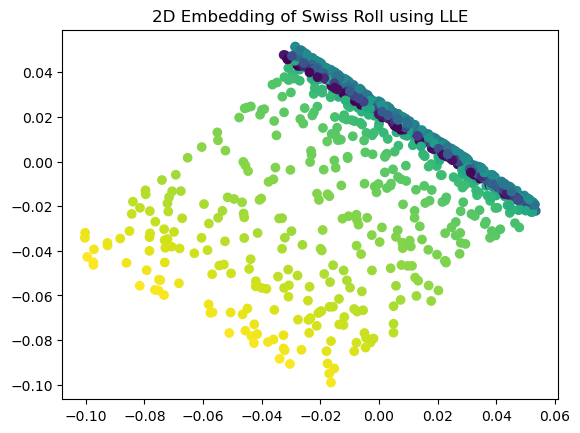

In [1]:
import numpy as np

def find_neighbors(X, k):
    """ Find k-nearest neighbors for each point in X """
    neighbors = []
    for i in range(len(X)):
        distances = np.linalg.norm(X[i] - X, axis=1)
        nearest_indices = np.argsort(distances)[1:k+1]
        neighbors.append(nearest_indices)
    return np.array(neighbors)

def compute_weights(X, neighbors, k, regularization=1e-3):
    """ Compute the weights that reconstruct each data point from its neighbors """
    N = len(X)
    W = np.zeros((N, N))
    
    for i in range(N):
        Z = X[neighbors[i]] - X[i]  # local coordinates
        C = Z @ Z.T  # local covariance
        C += np.eye(k) * regularization  # regularization term
        w = np.linalg.solve(C, np.ones(k))
        W[i, neighbors[i]] = w / np.sum(w)
    
    return W

def lle(X, d, k):
    """ Perform Locally Linear Embedding (LLE) """
    N = len(X)
    
    # Step 1: Find neighbors
    neighbors = find_neighbors(X, k)
    
    # Step 2: Compute weights
    W = compute_weights(X, neighbors, k)
    
    # Step 3: Compute embedding
    M = np.eye(N) - W
    M = M.T @ M
    eigenvalues, eigenvectors = np.linalg.eigh(M)
    
    # Return the bottom d+1 eigenvectors (ignoring the smallest eigenvector)
    return eigenvectors[:, 1:d+1]

# Example usage
if __name__ == "__main__":
    # Generate synthetic data (e.g., Swiss roll)
    from sklearn.datasets import make_swiss_roll
    X, _ = make_swiss_roll(n_samples=1000, noise=0.1)

    # Perform LLE
    d = 2  # target dimensionality
    k = 10  # number of neighbors
    Y = lle(X, d, k)

    # Plotting the result
    import matplotlib.pyplot as plt
    plt.scatter(Y[:, 0], Y[:, 1], c=_)
    plt.title("2D Embedding of Swiss Roll using LLE")
    plt.show()


## Manifold Learning: Laplacian Eigenmap

## Manifold Learning: Laplacian Eigenmap

Laplacian Eigenmap [6] finds the low-dimensional representation that most faithfully preserves the local similarity structure in the feature space.

Given a dataset \( \{x_1, \dots, x_n\} \), it is expected to construct a connected weighted graph \( G = (V, E) \) with edges connecting nearby points to each other. Consider the problem of mapping the weighted graph \( G(V, E) \) to a line so that connected points stay as close together as possible. Let \( y = [y_1, \dots, y_n]^T \) be such a map.

In Laplacian embedding, the input data is a matrix \( W \) of pairwise similarities among \( n \) data objects. \( W \) is viewed as the edge weights on a graph with \( n \) nodes. The task is to embed the nodes of the graph into 1-D space with coordinates \( (y_1, \dots, y_n) \). The objective is that if \( i, j \) are similar (i.e., \( w_{ij} \) is large), they should be adjacent in embedded space, i.e., \( (y_i - y_j)^2 \) should be as small as possible. This can be achieved by minimizing the objective function [6, 7]:

$$
\min_y \ E(y) = \frac{1}{2} \sum_{i,j} (y_i - y_j)^2 w_{ij}.
$$

This unconstrained optimization can be rewritten as:

$$
\min_y \ E(y) = y^T (D - W) y,
$$
where \( D = \text{Diag}(d_{11}, \dots, d_{nn}) \) with \( d_{ii} = \sum_{j=1}^{n} w_{ij}, \ i = 1, \dots, n \).

However, the unconstrained optimization problem has only the zero solution \( y = 0 \) due to:

$$
\frac{\partial E(y)}{\partial y} = 2(D - W)y = 0.
$$

To avoid the trivial solution \( y = 0 \), the unconstrained minimization should impose the constraint conditions:

1. Normalization: \( \sum_i y_i = 1 \),
2. Centralization: \( \sum_i y_i = 0 \).

For removing an arbitrary scaling factor in the embedding, the normalization constraint \( \sum_i y_i^2 = y^T y = 1 \) can be relaxed to \( y^T D y = 1 \). Then, the constrained form becomes:

$$
\min_y \ E(y) = y^T L y \quad \text{subject to} \quad y^T D y = 1,
$$
where \( L = D - W \) is the graph Laplacian. The above constrained minimization can be rewritten as the Lagrange multiplier form:

$$
\min_y \ L(y) = y^T L y + \lambda(1 - y^T D y).
$$

From:

$$
\frac{\partial L(y)}{\partial y} = 0,
$$

it follows that:

$$
Ly = \lambda D y,
$$
or equivalently the eigenvalue decomposition of the matrix \( D^{-1}L \):

$$
D^{-1} L y = \lambda y.
$$

Therefore, this Laplacian embedding method is called the Laplacian Eigenmap method [7].

In practical applications, we usually implement only the minimization problem with the constraint \( y^T D y = 1 \) because the constraint \( y^T 1 = 0 \) is easily implemented via \( y - \mu \), where \( \mu \) is the mean vector of \( y \). In other words, the Laplacian Eigenmap becomes the following minimization problem:

$$
y = \text{arg} \min \ y^T L y \quad \text{subject to} \quad y^T D y = 1.
$$

### Steps of Laplacian Eigenmap

1. **Construct Neighborhood Graph:**
   - \( \epsilon \)-neighborhoods: Nodes \( i \) and \( j \) are connected by an edge if \( \|x_i - x_j\|^2_2 < \epsilon \).
   - \( n \)-nearest neighbors: Nodes \( i \) and \( j \) are connected by an edge if \( i \) is among the \( n \)-nearest neighbors of \( j \) or vice versa.

2. **Choose Edge Weights:**
   - **Heat kernel:** 
   $$
   w_{ij} = 
   \begin{cases}
   \exp\left(-\frac{\|x_i - x_j\|^2_2}{t}\right), & \text{if nodes } i \text{ and } j \text{ are connected}; \\
   0, & \text{otherwise}.
   \end{cases}
   $$
   - **Simple-minded:** Set \( w_{ij} = 1 \) if and only if vertices \( i \) and \( j \) are connected by an edge. This simplification avoids the necessity of choosing \( t \).

3. **Make Eigenmaps:**
   - For the graph \( G(V, E) \), solve the generalized eigenvector problem \( Ly = \lambda D y \).
   - Leave out the eigenvector \( y \) associated with zero eigenvalues and use the next \( d \) eigenvectors for embedding in \( d \)-dimensional Euclidean space:
   $$
   x_i \rightarrow (y_1(i), \dots, y_d(i)).
   $$
   - Finally, make the centralization \( y \leftarrow y - \mu \).

### Locality Preserving Projections (LPP)

Locality Preserving Projections (LPP) in [53] is a linear approximation to Laplacian Eigenmaps in which the embedding coordinate vector \( y \) in Eq. (7.12.36) is approximated by the linear transformation \( y = X^T a \), where \( X = [x_1, \dots, x_n] \) is the data matrix and \( a \) is a linear transformation vector. After using \( X^T a \) instead of \( y \) in LLE optimization problem, the objective in LPP is given by:

$$
a = \text{arg} \min \ \frac{a^T X L X^T a}{a^T X D X^T a}.
$$
Local approaches to low-dimensional embedding (LLE or Laplacian Eigenmaps,
Cauchy graph embedding) have two principal advantages over a global approach
(Isomap): they tolerate a certain amount of curvature and they lead naturally to a
sparse eigenvalue problem. Local isometry assumption seems much more likely to
hold in practice than the more restrictive global isometry assumption in Isomaps.
The advantage of a global approach over local approaches is: it will give a more
faithful representation of the data’s global structure.


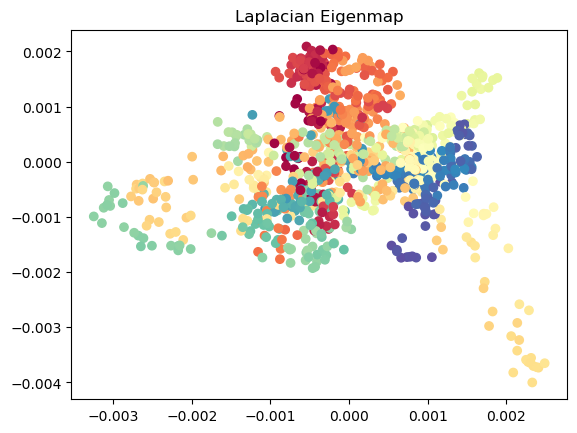

In [2]:
import numpy as np
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh

def laplacian_eigenmap(data, n_neighbors=5, n_components=2, method='knn', sigma=1.0):
    """
    Perform Laplacian Eigenmap dimensionality reduction.
    
    Parameters:
        data (ndarray): Input data of shape (n_samples, n_features).
        n_neighbors (int): Number of neighbors to use in graph construction.
        n_components (int): Number of dimensions for the embedding.
        method (str): 'knn' for k-nearest neighbors, 'epsilon' for epsilon neighborhood.
        sigma (float): Parameter for the heat kernel (used if method is 'knn').
        
    Returns:
        embedding (ndarray): Low-dimensional embedding of shape (n_samples, n_components).
    """
    # Step 1: Construct the neighborhood graph
    from sklearn.neighbors import kneighbors_graph, radius_neighbors_graph
    
    if method == 'knn':
        W = kneighbors_graph(data, n_neighbors=n_neighbors, mode='connectivity', include_self=True)
    elif method == 'epsilon':
        W = radius_neighbors_graph(data, radius=sigma, mode='connectivity', include_self=True)
    else:
        raise ValueError("method should be 'knn' or 'epsilon'")
    
    W = W.toarray()
    
    # Step 2: Choose edge weights using the heat kernel or simple-minded approach
    if method == 'knn':
        W = np.exp(-W**2 / (2. * sigma ** 2))
    
    # Step 3: Compute the Graph Laplacian
    D = np.diag(W.sum(axis=1))  # Degree matrix
    L = D - W  # Laplacian matrix
    
    # Step 4: Solve the generalized eigenvalue problem Lx = lambda Dx
    eigenvalues, eigenvectors = eigsh(L, k=n_components + 1, M=D, sigma=0.0, which='SM')
    
    # Step 5: Discard the first eigenvector (corresponding to eigenvalue 0)
    embedding = eigenvectors[:, 1:n_components + 1]
    
    return embedding

# Example usage:
if __name__ == "__main__":
    from sklearn.datasets import make_swiss_roll
    import matplotlib.pyplot as plt
    
    # Generate sample data
    X, _ = make_swiss_roll(n_samples=1000, noise=0.1)
    
    # Apply Laplacian Eigenmap
    embedding = laplacian_eigenmap(X, n_neighbors=10, n_components=2, method='knn', sigma=1.0)
    
    # Plot the results
    plt.scatter(embedding[:, 0], embedding[:, 1], c=_, cmap=plt.cm.Spectral)
    plt.title("Laplacian Eigenmap")
    plt.show()
